In [143]:
import pandas as pd
import numpy as np

df1 = pd.read_excel('附件.xlsx', sheet_name=0)
df1_valid = pd.read_excel('表1-填补缺失值.xlsx')
df2 = pd.read_excel('附件.xlsx', sheet_name=1)
df2_valid = pd.read_excel('文物样品信息汇总-填补缺失值.xlsx')
df3 = pd.read_excel('附件.xlsx', sheet_name=2)

In [144]:
df_whe = df2_valid[df2_valid.表面风化=='风化'].drop([23,25,29,30,44,45,48,53,56,60])
df_no_whe = pd.concat([df2_valid[df2_valid.表面风化=='无风化'],df2_valid.loc[[23,25,29,30,44,45,48,53,56,60]]]).sort_index()

In [145]:
Y_whe = df_whe.类型
Y_no_whe = df_no_whe.类型
X_whe = df_whe.drop(['文物编号','文物采样点','类型','表面风化','纹饰','颜色'],axis=1)
X_no_whe = df_no_whe.drop(['文物编号','文物采样点','类型','表面风化','纹饰','颜色'],axis=1)

In [152]:
from sklearn import tree
from sklearn.model_selection import train_test_split
Xtrain_whe, Xtest_whe, Ytrain_whe, Ytest_whe = train_test_split(X_whe, Y_whe, test_size=0.2,random_state=400)
Xtrain_no_whe, Xtest_no_whe, Ytrain_no_whe, Ytest_no_whe = train_test_split(X_no_whe, Y_no_whe, test_size=0.2,random_state=2022)

有风化，不排除铅钡尝试

In [153]:
clf_whe = tree.DecisionTreeClassifier(random_state=400).fit(Xtrain_whe, Ytrain_whe)
clf_whe.score(Xtest_whe,Ytest_whe)

1.0

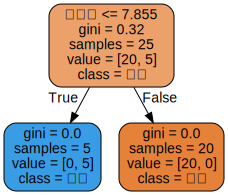

In [159]:
import graphviz
# 这个特征名就是刚才英文翻译成中文了
feature_name = ['二氧化硅','氧化钠','氧化钾','氧化钙','氧化镁','氧化铝','氧化铁','氧化铜','氧化铅','氧化钡','五氧化二磷','氧化锶','氧化锡','二氧化硫']
# filled：填充颜色，不纯度越低越深
# rounded：圆角矩形
dot_data = tree.export_graphviz(clf_whe
                                ,feature_names = feature_name
                                ,class_names=["铅钡","高钾"]
                                ,filled=True
                                ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

无风化，不排除铅尝试

In [160]:
clf_no_whe = tree.DecisionTreeClassifier(random_state=1000).fit(Xtrain_no_whe, Ytrain_no_whe)
clf_no_whe.score(Xtest_no_whe,Ytest_no_whe)

1.0

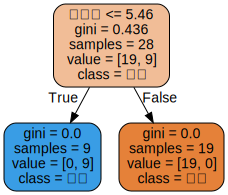

In [161]:
import graphviz
# 这个特征名就是刚才英文翻译成中文了
feature_name = ['二氧化硅','氧化钠','氧化钾','氧化钙','氧化镁','氧化铝','氧化铁','氧化铜','氧化铅','氧化钡','五氧化二磷','氧化锶','氧化锡','二氧化硫']
# filled：填充颜色，不纯度越低越深
# rounded：圆角矩形
dot_data = tree.export_graphviz(clf_no_whe
                                ,feature_names = feature_name
                                ,class_names=["铅钡","高钾"]
                                ,filled=True
                                ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

去除铅尝试

In [162]:
X_whe_dropPb = X_whe.drop('氧化铅(PbO)',axis=1)

In [166]:
Xtrain_whe_dropPb, Xtest_whe_dropPb, Ytrain_whe_dropPb, Ytest_whe_dropPb = train_test_split(X_whe_dropPb, Y_whe, test_size=0.2, random_state=2022)

In [167]:
clf_whe_dropPb = tree.DecisionTreeClassifier(random_state=2022).fit(Xtrain_whe_dropPb, Ytrain_whe_dropPb)
clf_whe_dropPb.score(Xtest_whe_dropPb, Ytest_whe_dropPb)

1.0

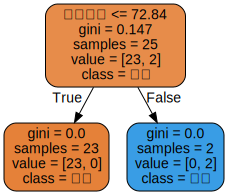

In [168]:
import graphviz

# 这个特征名就是刚才英文翻译成中文了
feature_name = ['二氧化硅', '氧化钠', '氧化钾', '氧化钙', '氧化镁', '氧化铝', '氧化铁', '氧化铜', '氧化钡', '五氧化二磷', '氧化锶', '氧化锡', '二氧化硫']
# filled：填充颜色，不纯度越低越深
# rounded：圆角矩形
dot_data = tree.export_graphviz(clf_whe_dropPb
                                , feature_names=feature_name
                                , class_names=["铅钡", "高钾"]
                                , filled=True
                                , rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

In [169]:
X_no_whe_dropPb = X_no_whe.drop('氧化铅(PbO)',axis=1)
Xtrain_no_whe_dropPb, Xtest_no_whe_dropPb, Ytrain_no_whe_dropPb, Ytest_no_whe_dropPb = train_test_split(X_no_whe_dropPb, Y_no_whe, test_size=0.2,random_state=800)

In [170]:
clf_no_whe_dropPb = tree.DecisionTreeClassifier(random_state=2022).fit(Xtrain_no_whe_dropPb, Ytrain_no_whe_dropPb)
clf_no_whe_dropPb.score(Xtest_no_whe_dropPb, Ytest_no_whe_dropPb)

1.0

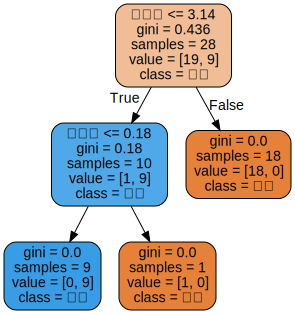

In [171]:
import graphviz

# 这个特征名就是刚才英文翻译成中文了
feature_name = ['二氧化硅', '氧化钠', '氧化钾', '氧化钙', '氧化镁', '氧化铝', '氧化铁', '氧化铜', '氧化钡', '五氧化二磷', '氧化锶', '氧化锡', '二氧化硫']
# filled：填充颜色，不纯度越低越深
# rounded：圆角矩形
dot_data = tree.export_graphviz(clf_no_whe_dropPb
                                , feature_names=feature_name
                                , class_names=["铅钡", "高钾"]
                                , filled=True
                                , rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

有风化，去除铅、二氧化硅

In [16]:
# X_whe_dropPb_dropSiO2 = X_no_whe_dropPb.drop('二氧化硅(SiO2)', axis=1)
# X_whe_dropPb_dropSiO2

In [17]:
# X_whe_dropPb_dropSiO2 = X_whe_dropPb.drop('二氧化硅(SiO2)', axis=1)
# Xtrain_whe_dropPb_dropSiO2, Xtest_whe_dropPb_dropSiO2, Ytrain_whe_dropPb_dropSiO2, Ytest_whe_dropPb_dropSiO2 = train_test_split(X_whe_dropPb_dropSiO2, Y_whe,test_size=0.2)
# clf_whe_dropPb_dropSiO2 = tree.DecisionTreeClassifier().fit(Xtrain_whe_dropPb_dropSiO2, Ytrain_whe_dropPb_dropSiO2)
# print(clf_whe_dropPb_dropSiO2.score(Xtest_whe_dropPb_dropSiO2, Ytest_whe_dropPb_dropSiO2))
# import graphviz
# # 这个特征名就是刚才英文翻译成中文了
# feature_name = ['二氧化硅', '氧化钠', '氧化钾', '氧化钙', '氧化镁', '氧化铝', '氧化铁', '氧化铜', '氧化钡', '五氧化二磷', '氧化锶', '氧化锡']
# # filled：填充颜色，不纯度越低越深
# # rounded：圆角矩形
# dot_data = tree.export_graphviz(clf_whe_dropPb_dropSiO2
#                                 , feature_names=feature_name
#                                 , class_names=["铅钡", "高钾"]
#                                 , filled=True
#                                 , rounded=True
#                                 )
# graph = graphviz.Source(dot_data)
# graph

随机森林尝试

In [172]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
Xtrain_whe, Xtest_whe, Ytrain_whe, Ytest_whe = train_test_split(X_whe, Y_whe, test_size=0.2,random_state=400)
Xtrain_no_whe, Xtest_no_whe, Ytrain_no_whe, Ytest_no_whe = train_test_split(X_no_whe, Y_no_whe, test_size=0.2,random_state=300)
le1 = LabelEncoder().fit(Ytrain_whe)
rfr1 = RandomForestRegressor(random_state=2022, n_estimators=100)
rfr1 = rfr1.fit(Xtrain_whe, le1.transform(Ytrain_whe))
score1 = rfr1.score(Xtest_whe, le1.transform(Ytest_whe))
print(score1)
le12 = LabelEncoder().fit(Ytrain_no_whe)
rfr2 = RandomForestRegressor(random_state=2022, n_estimators=1000)
rfr2 = rfr2.fit(Xtrain_no_whe, le1.transform(Ytrain_no_whe))
score2 = rfr2.score(Xtest_no_whe, le1.transform(Ytest_no_whe))
print(score2)

0.9988333333333334
0.9999708333333334


In [173]:
pd.Series(rfr1.feature_importances_,index=X_whe.columns).sort_values(ascending=False)

氧化铅(PbO)       0.515152
二氧化硅(SiO2)     0.444444
氧化钡(BaO)       0.030303
氧化锶(SrO)       0.010101
氧化钠(Na2O)      0.000000
氧化钾(K2O)       0.000000
氧化钙(CaO)       0.000000
氧化镁(MgO)       0.000000
氧化铝(Al2O3)     0.000000
氧化铁(Fe2O3)     0.000000
氧化铜(CuO)       0.000000
五氧化二磷(P2O5)    0.000000
氧化锡(SnO2)      0.000000
二氧化硫(SO2)      0.000000
dtype: float64

In [174]:
pd.Series(rfr2.feature_importances_,index=X_no_whe.columns).sort_values(ascending=False)

氧化铅(PbO)       0.582
氧化钡(BaO)       0.257
氧化钾(K2O)       0.141
氧化钙(CaO)       0.015
氧化锶(SrO)       0.003
氧化铁(Fe2O3)     0.001
氧化铜(CuO)       0.001
二氧化硅(SiO2)     0.000
氧化钠(Na2O)      0.000
氧化镁(MgO)       0.000
氧化铝(Al2O3)     0.000
五氧化二磷(P2O5)    0.000
氧化锡(SnO2)      0.000
二氧化硫(SO2)      0.000
dtype: float64

高钾聚类

In [89]:
df2_k_cc = df2_valid[df2_valid.类型=='高钾'].drop(['文物编号','文物采样点','纹饰','类型','颜色','表面风化'],axis=1)
df2_k_cc.iloc[1] = df2_k_cc.iloc[1:3].mean()
df2_k_cc.iloc[5] = df2_k_cc.iloc[5:7].mean()
df2_k_cc = df2_k_cc.drop([3,7])
df2_k_cc

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,69.33,0.00,9.990,6.320,0.870,3.93,1.740,3.870,0.000,0.000,1.17,0.000,0.00,0.39
2,74.38,0.00,8.780,3.940,0.555,4.78,1.080,2.935,0.830,1.430,0.68,0.050,0.00,0.00
4,65.88,0.00,9.670,7.120,1.560,6.44,2.060,2.180,0.000,0.000,0.79,0.000,0.00,0.36
5,61.58,0.00,10.950,7.350,1.770,7.50,2.620,3.270,0.000,0.000,0.94,0.060,0.00,0.47
6,63.73,0.00,7.525,2.705,1.855,10.60,4.215,2.345,0.275,1.175,4.34,0.115,0.00,0.00
8,92.63,0.00,0.000,1.070,0.000,1.98,0.170,3.240,0.000,0.000,0.61,0.000,0.00,0.00
11,95.02,0.00,0.590,0.620,0.000,1.32,0.320,1.550,0.000,0.000,0.35,0.000,0.00,0.00
12,96.77,0.00,0.920,0.210,0.000,0.81,0.260,0.840,0.000,0.000,0.00,0.000,0.00,0.00
14,94.29,0.00,1.010,0.720,0.000,1.46,0.290,1.650,0.000,0.000,0.15,0.000,0.00,0.00
15,59.01,2.86,12.530,8.700,0.000,6.16,2.880,4.730,0.000,0.000,1.27,0.000,0.00,0.00


In [90]:
# (df2_k_cc.std() / df2_k_cc.mean()).sort_values(ascending=False)

In [91]:
df2_k_cc.std().sort_values(ascending=False)

二氧化硅(SiO2)     14.188687
氧化钾(K2O)        5.449276
氧化钙(CaO)        3.292235
氧化铝(Al2O3)      2.906761
氧化铜(CuO)        1.361628
氧化铁(Fe2O3)      1.268771
氧化钠(Na2O)       1.145041
五氧化二磷(P2O5)     1.038901
氧化镁(MgO)        0.669530
氧化钡(BaO)        0.632364
氧化锡(SnO2)       0.590000
氧化铅(PbO)        0.481790
二氧化硫(SO2)       0.165242
氧化锶(SrO)        0.035413
dtype: float64

In [92]:
k_no_zero_count = (df2_k_cc.values != 0).sum(axis=0)
(df2_k_cc.sum()/k_no_zero_count).sort_values(ascending=False)

二氧化硅(SiO2)     77.592500
氧化钾(K2O)        7.609615
氧化铝(Al2O3)      4.727500
氧化钙(CaO)        4.171000
氧化钠(Na2O)       2.780000
氧化锡(SnO2)       2.360000
氧化铜(CuO)        2.234667
氧化钡(BaO)        1.525000
氧化铁(Fe2O3)      1.298333
氧化镁(MgO)        1.065455
五氧化二磷(P2O5)     0.963571
氧化铅(PbO)        0.767000
二氧化硫(SO2)       0.406667
氧化锶(SrO)        0.067000
dtype: float64

In [93]:
# df2_k_cc.mean().sort_values(ascending=False)

In [94]:
df2_k_cc_cluster = df2_k_cc[['二氧化硅(SiO2)','氧化铝(Al2O3)','氧化钙(CaO)']]
df2_k_cc_cluster

,二氧化硅(SiO2),氧化铝(Al2O3),氧化钙(CaO)
0,69.33,3.93,6.320
2,74.38,4.78,3.940
4,65.88,6.44,7.120
5,61.58,7.50,7.350
6,63.73,10.60,2.705
8,92.63,1.98,1.070
11,95.02,1.32,0.620
12,96.77,0.81,0.210
14,94.29,1.46,0.720
15,59.01,6.16,8.700


D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6865877253565452


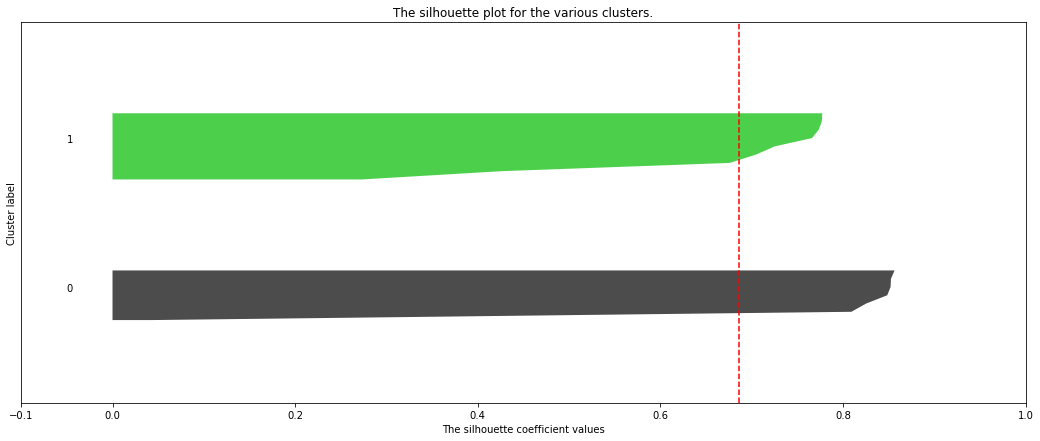

D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.6748029438072418


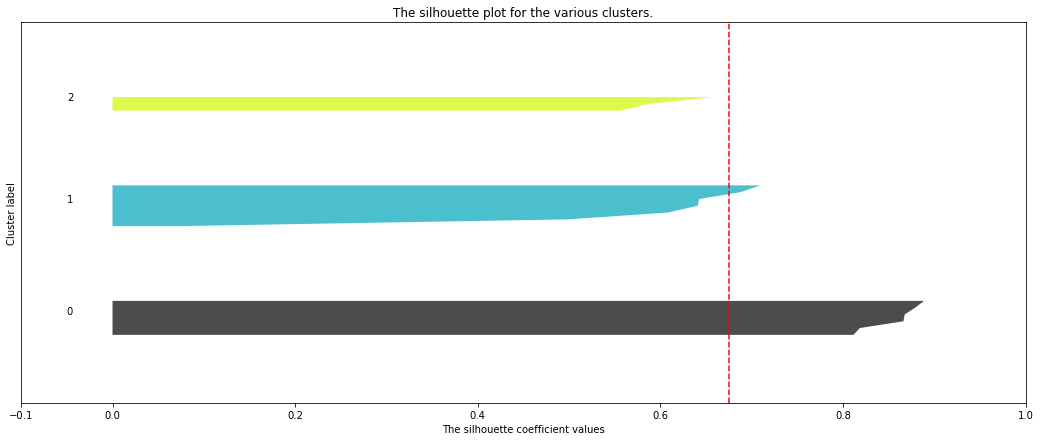

D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5649805217534238


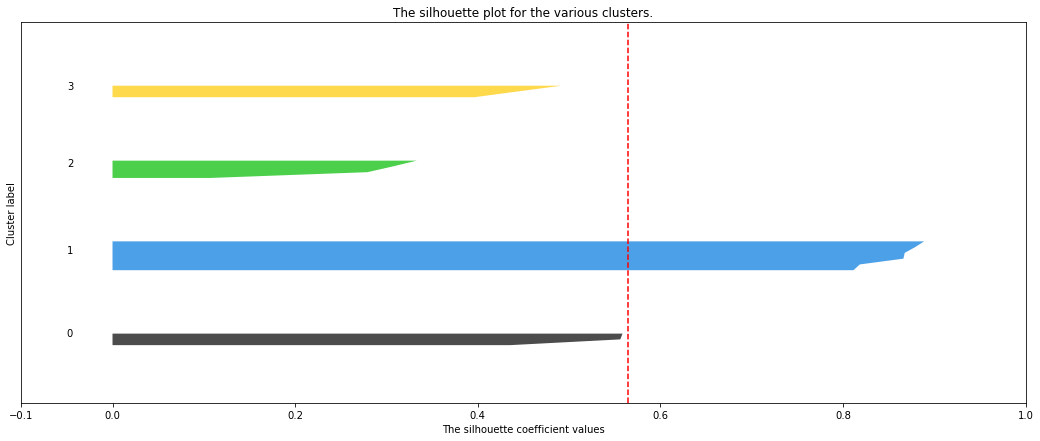

In [95]:
# 包装成一个大循环
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

X_k = df2_k_cc_cluster
for n_clusters in [2,3,4]:
    n_clusters = n_clusters
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, X_k.shape[0] + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=2022).fit(X_k)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(X_k, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X_k, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                          ,ith_cluster_silhouette_values
                          ,facecolor=color
                          ,alpha=0.7
                         )
        ax1.text(-0.05
                 , y_lower + 0.5 * size_cluster_i
                 , str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

In [96]:
clusterer = KMeans(n_clusters=2, random_state=2022).fit(df2_k_cc_cluster)
pri_k_cluster_res = clusterer.labels_
k_cluster_res = clusterer.labels_
k_cluster_res

D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [97]:
# 输出结果
k_cluster_res = list(k_cluster_res)
k_cluster_res.insert(1,k_cluster_res[1])
k_cluster_res.insert(5,k_cluster_res[5])
k_cluster_info_all = df2_valid[df2_valid.类型=='高钾']
k_cluster_info_all['亚类标号'] = k_cluster_res
k_cluster_info_all.to_excel('高钾亚类划分结果.xlsx',index=False)

In [98]:
# 分析结果
sub_cl0_mean = k_cluster_info_all[k_cluster_info_all.亚类标号 == 0].drop(
    ['文物编号', '亚类标号', '文物采样点', '颜色', '类型', '表面风化', '纹饰'], axis=1).mean()
sub_cl1_mean = k_cluster_info_all[k_cluster_info_all.亚类标号 == 1].drop(
    ['文物编号', '亚类标号', '文物采样点', '颜色', '类型', '表面风化', '纹饰'], axis=1).mean()
pd.DataFrame([sub_cl0_mean, sub_cl1_mean], columns=sub_cl0_mean.index)

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,91.891429,0.000000,1.811429,0.745714,0.387143,2.090000,0.227143,1.338571,0.000000,0.000000,0.434286,0.010000,0.337143,0.000000
1,66.940909,0.758182,9.322727,5.817273,1.038182,6.944545,2.107273,2.675455,0.449091,0.652727,1.406364,0.039091,0.000000,0.110909


In [99]:
# 灵敏度分析1
ccs = ['二氧化硅(SiO2)','氧化铝(Al2O3)','氧化钙(CaO)']
pre_labels = pri_k_cluster_res
pre_data = np.array(df2_k_cc_cluster)
wav_data = pre_data[pre_labels==0]
record = np.zeros((28,5),dtype=object)
rd_idx = 0
for i in range(len(ccs)):
    for wav in [-0.01,-0.02,-0.05,-0.1,0.5,1,3,5,7,8,9,10]:
        if (i == 0) & (wav > 0):
            continue
        if (i != 0) & (wav < 0):
            continue
        new_data = np.array(pre_data)
        new_wave_data = np.array(wav_data)
        new_wave_data[:,i] = new_wave_data[:,i] * (1 + wav)
        new_data[pre_labels==0] = new_wave_data
        clusterer = KMeans(n_clusters=2, random_state=2022).fit(new_data)
        cl_res = clusterer.labels_
        if cl_res[0]==0:
            cl_res = np.where(cl_res==0,1,0)
        record[rd_idx,:] = [ccs[i],wav,pre_labels,cl_res,np.all(pre_labels==cl_res)]
        rd_idx += 1
pd.DataFrame(record,columns=['化学成分', '波动率', '波动前的聚类结果', '波动后的聚类结果', '聚类结果是否保持不变'])

D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

,化学成分,波动率,波动前的聚类结果,波动后的聚类结果,聚类结果是否保持不变
0,二氧化硅(SiO2),-0.01,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]","[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]",True
1,二氧化硅(SiO2),-0.02,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]","[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]",False
2,二氧化硅(SiO2),-0.05,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]","[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]",False
3,二氧化硅(SiO2),-0.1,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]","[1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]",False
4,氧化铝(Al2O3),0.5,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]","[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]",True
5,氧化铝(Al2O3),1,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]","[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]",True
6,氧化铝(Al2O3),3,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]","[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]",True
7,氧化铝(Al2O3),5,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]","[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]",True
8,氧化铝(Al2O3),7,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]","[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]",True
9,氧化铝(Al2O3),8,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]","[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]",True


In [476]:
pre_data

array([[69.33 ,  9.99 ,  6.32 ,  3.93 ],
       [74.38 ,  8.78 ,  3.94 ,  4.78 ],
       [65.88 ,  9.67 ,  7.12 ,  6.44 ],
       [61.58 , 10.95 ,  7.35 ,  7.5  ],
       [63.73 ,  7.525,  2.705, 10.6  ],
       [92.63 ,  0.   ,  1.07 ,  1.98 ],
       [95.02 ,  0.59 ,  0.62 ,  1.32 ],
       [96.77 ,  0.92 ,  0.21 ,  0.81 ],
       [94.29 ,  1.01 ,  0.72 ,  1.46 ],
       [59.01 , 12.53 ,  8.7  ,  6.16 ],
       [62.47 , 12.28 ,  8.23 ,  9.23 ],
       [65.18 , 14.52 ,  8.27 ,  6.18 ],
       [79.46 ,  9.42 ,  0.   ,  3.05 ],
       [76.68 ,  0.   ,  4.71 ,  6.19 ],
       [92.35 ,  0.74 ,  1.66 ,  3.5  ],
       [92.72 ,  0.   ,  0.94 ,  2.51 ]])

In [477]:
wav_data

array([[92.63,  0.  ,  1.07,  1.98],
       [95.02,  0.59,  0.62,  1.32],
       [96.77,  0.92,  0.21,  0.81],
       [94.29,  1.01,  0.72,  1.46],
       [92.35,  0.74,  1.66,  3.5 ],
       [92.72,  0.  ,  0.94,  2.51]])

In [ ]:
# 灵敏度分析1
# record2 = np.zeros((60,4),dtype=object)
# rd_idx = 0
# for i in range(df2_k_cc_cluster.columns):
#     for j in range(df2_k_cc_cluster.columns):
#         if i == j:
#             continue
#         for wav in [-0.15,-0.1,-0.05,-0.02,-0.01,0,0.01,0.02,0.05,0.1,0.15]:
#             X_k = np.array(df2_k_cc_cluster.values)
#             X_k[:,fea_idx] = X_k[:,fea_idx] * (1+wav)
#             # X_k = X_k / X_k.sum(axis=1).reshape(-1,1)
#             clusterer = KMeans(n_clusters=2, random_state=2022).fit(X_k)
#             k_cluster_res = clusterer.labels_
#             cls1_count = k_cluster_res.sum()
#             cls0_count = len(k_cluster_res) - k_cluster_res.sum()
#             record1[rd_idx,:] = [df2_k_cc_cluster.columns[i],wav,cls0_count,cls1_count]
#             rd_idx += 1
# record2

铅钡分析

In [133]:
df2_pb_cc = df2_valid[df2_valid.类型 == '铅钡'].drop(['文物编号', '文物采样点', '纹饰', '类型', '颜色', '表面风化'], axis=1)
# df2_k_cc.iloc[1] = df2_k_cc.iloc[1:3].mean()
# df2_k_cc.iloc[5] = df2_k_cc.iloc[5:7].mean()
# df2_k_cc = df2_k_cc.drop([3, 7])
df2_pb_cc

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
1,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.00,0.00
9,20.14,0.00,0.00,1.48,0.00,1.34,0.00,10.41,28.68,31.23,3.59,0.37,0.00,2.58
10,4.61,0.00,0.00,3.19,0.00,1.11,0.00,3.14,32.45,30.62,7.56,0.53,0.00,15.03
13,33.59,0.00,0.21,3.51,0.71,2.69,0.00,4.93,25.39,14.61,9.38,0.37,0.00,0.00
19,29.64,0.00,0.00,2.93,0.59,3.57,1.33,3.51,42.82,5.35,8.83,0.19,0.00,0.00
20,37.36,0.00,0.71,0.00,0.00,5.45,1.51,4.78,9.30,23.55,5.75,0.00,0.00,0.00
23,53.79,7.92,0.00,0.50,0.71,1.42,0.00,2.99,16.98,11.86,0.00,0.33,0.00,0.00
24,31.94,0.00,0.00,0.47,0.00,1.59,0.00,8.46,29.14,26.23,0.14,0.91,0.00,0.00
25,50.61,2.31,0.00,0.63,0.00,1.90,1.55,1.12,31.90,6.65,0.19,0.20,0.00,0.00
26,3.72,0.00,0.40,3.01,0.00,1.18,0.00,3.60,29.92,35.45,6.04,0.62,0.00,15.95


In [134]:
df2_pb_cc.iloc[13] = df2_pb_cc.iloc[13:15].mean()
df2_pb_cc.iloc[26] = df2_pb_cc.iloc[26:28].mean()
df2_pb_cc.iloc[28] = df2_pb_cc.iloc[28:30].mean()
df2_pb_cc.iloc[39] = df2_pb_cc.iloc[39:41].mean()
df2_pb_cc = df2_pb_cc.drop([32,45,47,58])
df2_pb_cc

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
1,36.280,0.00,1.050,2.340,1.180,5.730,1.860,0.260,47.43,0.000,3.570,0.190,0.000,0.00
9,20.140,0.00,0.000,1.480,0.000,1.340,0.000,10.410,28.68,31.230,3.590,0.370,0.000,2.58
10,4.610,0.00,0.000,3.190,0.000,1.110,0.000,3.140,32.45,30.620,7.560,0.530,0.000,15.03
13,33.590,0.00,0.210,3.510,0.710,2.690,0.000,4.930,25.39,14.610,9.380,0.370,0.000,0.00
19,29.640,0.00,0.000,2.930,0.590,3.570,1.330,3.510,42.82,5.350,8.830,0.190,0.000,0.00
20,37.360,0.00,0.710,0.000,0.000,5.450,1.510,4.780,9.30,23.550,5.750,0.000,0.000,0.00
23,53.790,7.92,0.000,0.500,0.710,1.420,0.000,2.990,16.98,11.860,0.000,0.330,0.000,0.00
24,31.940,0.00,0.000,0.470,0.000,1.590,0.000,8.460,29.14,26.230,0.140,0.910,0.000,0.00
25,50.610,2.31,0.000,0.630,0.000,1.900,1.550,1.120,31.90,6.650,0.190,0.200,0.000,0.00
26,3.720,0.00,0.400,3.010,0.000,1.180,0.000,3.600,29.92,35.450,6.040,0.620,0.000,15.95


In [135]:
# (df2_pb_cc.std() / df2_pb_cc.mean()).sort_values(ascending=False)

In [136]:
df2_pb_cc.std().sort_values(ascending=False)

二氧化硅(SiO2)     18.905076
氧化铅(PbO)       14.954695
氧化钡(BaO)        8.551023
五氧化二磷(P2O5)     3.682060
二氧化硫(SO2)       3.268598
氧化铝(Al2O3)      3.111451
氧化铜(CuO)        2.514070
氧化钠(Na2O)       1.732624
氧化钙(CaO)        1.487857
氧化铁(Fe2O3)      0.937269
氧化镁(MgO)        0.641085
氧化锶(SrO)        0.264225
氧化钾(K2O)        0.227595
氧化锡(SnO2)       0.207450
dtype: float64

In [137]:
# df2_pb_cc.mean().sort_values(ascending=False)

In [138]:
pb_no_zero_count = (df2_pb_cc.values != 0).sum(axis=0)
(df2_pb_cc.sum()/pb_no_zero_count).sort_values(ascending=False)

二氧化硅(SiO2)     39.509667
氧化铅(PbO)       32.812000
氧化钡(BaO)       11.239302
二氧化硫(SO2)       7.836000
氧化铝(Al2O3)      3.651111
五氧化二磷(P2O5)     3.643875
氧化钠(Na2O)       2.970000
氧化钙(CaO)        2.036071
氧化铜(CuO)        2.021786
氧化铁(Fe2O3)      1.159583
氧化镁(MgO)        1.058462
氧化锡(SnO2)       0.548750
氧化锶(SrO)        0.413421
氧化钾(K2O)        0.328043
dtype: float64

In [139]:
df2_pb_cc_cluster = df2_pb_cc[['二氧化硅(SiO2)','五氧化二磷(P2O5)','二氧化硫(SO2)','氧化铝(Al2O3)','氧化铜(CuO)']]
df2_pb_cc_cluster

,二氧化硅(SiO2),五氧化二磷(P2O5),二氧化硫(SO2),氧化铝(Al2O3),氧化铜(CuO)
1,36.280,3.570,0.00,5.730,0.260
9,20.140,3.590,2.58,1.340,10.410
10,4.610,7.560,15.03,1.110,3.140
13,33.590,9.380,0.00,2.690,4.930
19,29.640,8.830,0.00,3.570,3.510
20,37.360,5.750,0.00,5.450,4.780
23,53.790,0.000,0.00,1.420,2.990
24,31.940,0.140,0.00,1.590,8.460
25,50.610,0.190,0.00,1.900,1.120
26,3.720,6.040,15.95,1.180,3.600


D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6008351965976405


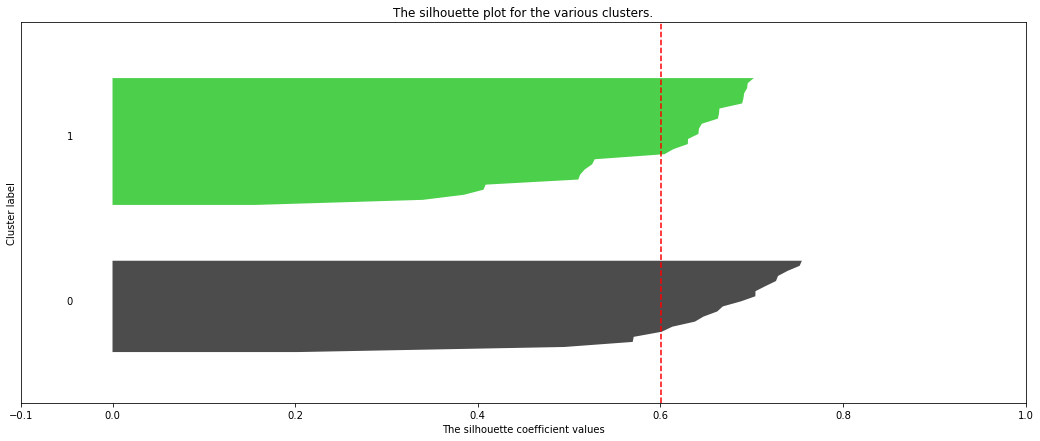

D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.46082551332770944


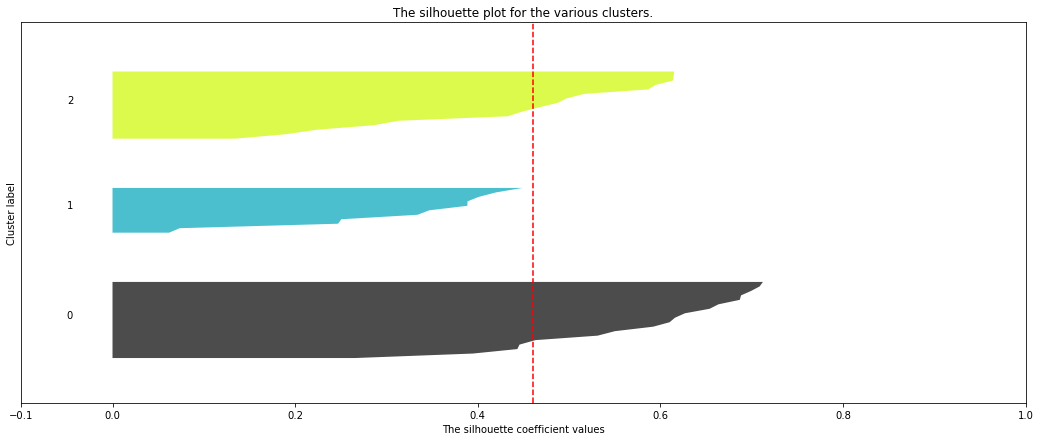

D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.4029908011756091


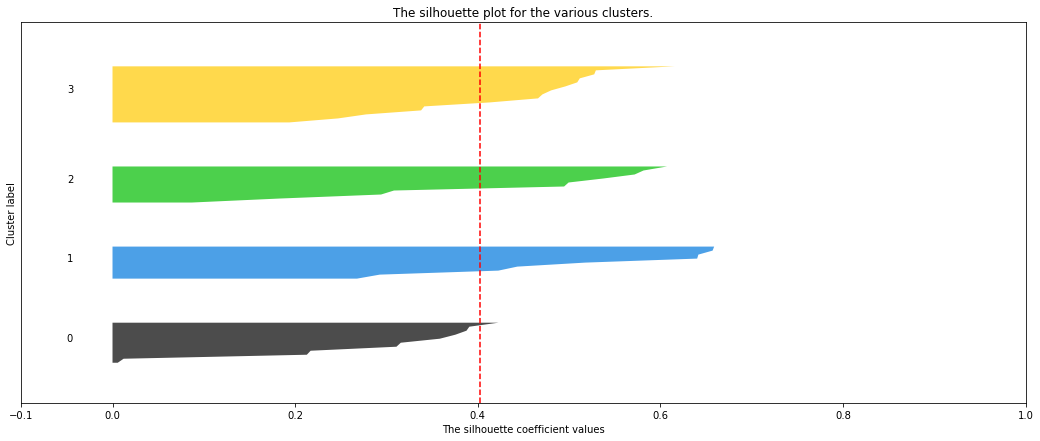

In [142]:
# 包装成一个大循环
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm

X_pb = df2_pb_cc_cluster
for n_clusters in [2, 3, 4]:
    n_clusters = n_clusters
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, X_pb.shape[0] + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=2022).fit(X_pb)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(X_pb, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X_pb, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                          , ith_cluster_silhouette_values
                          , facecolor=color
                          , alpha=0.7
                          )
        ax1.text(-0.05
                 , y_lower + 0.5 * size_cluster_i
                 , str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

In [126]:
clusterer = KMeans(n_clusters=2, random_state=2022).fit(X_pb)
pri_pb_clu_res = clusterer.labels_
pb_cluster_res = clusterer.labels_

D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [113]:
pb_cluster_res = list(pb_cluster_res)
pb_cluster_res.insert(13,pb_cluster_res[13])
pb_cluster_res.insert(26,pb_cluster_res[26])
pb_cluster_res.insert(28,pb_cluster_res[28])
pb_cluster_res.insert(39,pb_cluster_res[39])
pb_cluster_res

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1]

In [85]:
# 输出结果
pb_cluster_info_all = df2_valid[df2_valid.类型=='铅钡']
pb_cluster_info_all['亚类标号'] = pb_cluster_res
pb_cluster_info_all.to_excel('铅钡亚类划分结果.xlsx',index=False)

C:\Windows\Temp\ipykernel_27384\937272079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pb_cluster_info_all['亚类标号'] = pb_cluster_res


In [128]:
# 分析结果
sub_cl0_mean = pb_cluster_info_all[pb_cluster_info_all.亚类标号==0].drop(['文物编号','亚类标号','文物采样点','颜色','类型','表面风化','纹饰'],axis=1).mean()
sub_cl1_mean = pb_cluster_info_all[pb_cluster_info_all.亚类标号==1].drop(['文物编号','亚类标号','文物采样点','颜色','类型','表面风化','纹饰'],axis=1).mean()
# sub_cl2_mean = pb_cluster_info_all[pb_cluster_info_all.亚类标号==2].drop(['文物编号','亚类标号','文物采样点','颜色','类型','表面风化','纹饰'],axis=1).mean()

In [129]:
# pd.DataFrame([sub_cl0_mean,sub_cl1_mean,sub_cl2_mean],columns=sub_cl0_mean.index)
pd.DataFrame([sub_cl0_mean,sub_cl1_mean],columns=sub_cl0_mean.index)

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,58.496500,1.975000,0.161500,1.199500,0.739000,5.044500,0.580000,0.984500,20.41300,7.196500,0.896500,0.234000,0.077000,0.183000
1,25.343793,0.166207,0.181724,2.636552,0.581034,2.717931,0.708276,2.496897,42.27069,12.762069,4.945172,0.426552,0.045172,1.224828


In [132]:
# 灵敏度分析2
ccs = ['二氧化硅(SiO2)','五氧化二磷(P2O5)','二氧化硫(SO2)','氧化铝(Al2O3)','氧化铜(CuO)']
pre_labels = pri_pb_clu_res
pre_data = np.array(df2_pb_cc_cluster)
wav_data = pre_data[pre_labels==0]
record = np.zeros((35,5),dtype=object)
rd_idx = 0
wav_range = [
    [-0.01,-0.02,-0.05,-0.1,-0.15,-0.2,-0.3],
    [1,3,5,7,8,9,10],
    [1,3,5,7,8,9,10],
    [-0.1,-0.3,-0.5,-0.7,-0.8,-0.9,-0.99],
    [1,3,5,7,8,9,10],
]
for i in range(5):
    for wav in wav_range[i]:
        new_data = np.array(pre_data)
        new_wave_data = np.array(wav_data)
        new_wave_data[:,i] = new_wave_data[:,i] * (1 + wav)
        new_data[pre_labels==0] = new_wave_data
        clusterer = KMeans(n_clusters=2, random_state=2022).fit(new_data)
        cl_res = clusterer.labels_
        if cl_res[0]==0:
            cl_res = np.where(cl_res==0,1,0)
        record[rd_idx,:] = [ccs[i],wav,pre_labels,cl_res,np.all(pre_labels==cl_res)]
        rd_idx += 1
pd.DataFrame(record,columns=['化学成分', '波动率', '波动前的聚类结果', '波动后的聚类结果', '聚类结果是否保持不变'])

D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

,化学成分,波动率,波动前的聚类结果,波动后的聚类结果,聚类结果是否保持不变
0,二氧化硅(SiO2),-0.01,"[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...","[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...",True
1,二氧化硅(SiO2),-0.02,"[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...","[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...",True
2,二氧化硅(SiO2),-0.05,"[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...","[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...",True
3,二氧化硅(SiO2),-0.1,"[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...","[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...",False
4,二氧化硅(SiO2),-0.15,"[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...","[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, ...",False
5,二氧化硅(SiO2),-0.2,"[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...","[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, ...",False
6,二氧化硅(SiO2),-0.3,"[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...","[1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, ...",False
7,五氧化二磷(P2O5),1,"[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...","[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...",True
8,五氧化二磷(P2O5),3,"[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...","[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...",True
9,五氧化二磷(P2O5),5,"[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...","[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...",True
